<a href="https://colab.research.google.com/github/phylypo/TimeSeriesPrediction/blob/main/Time_Series_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of Time Series Forecasting from Statistical to ML and Recent DL Approaches 

Topics for this notebook:
- Decompose (FFT.ipynb)
 - Generate Synthic data
 - Decompose FFT


## Generate Synthetic Data
To help understand the trend, seasonality and noise, what a better way to learn then to generate the data ourselves.


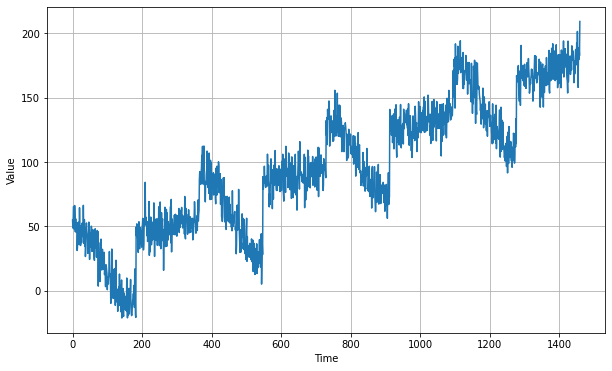

In [ ]:
#code from: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/S%2BP_Week_1_Lesson_2.ipynb
import numpy as np
import matplotlib.pyplot as plt
  
def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.5,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(2 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
series = trend(time, 0.1)
baseline = 10
baseline = 10
amplitude = 40
slope = 0.01
noise_level = 10

# Create the series
series += baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plt.plot(time[0:], series[0:], "-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
series

array([ 52.48357 ,  49.48275 ,  53.574738, ..., 284.36185 , 281.42908 ,
       312.1077  ], dtype=float32)

## Decompose with FFT
“If you want to find the secrets of the universe, think in terms of energy, frequency and vibration.” ― Nikola Tesla

Fast Fourier Transform (FFT) decomposes signal from time domain into frequency domain.

A signal can be decomposed into a series of sine wave.


![time to frequency domain](https://miro.medium.com/max/471/1*uL4gqMutokf5r-M8P7bG7w.png)

*(https://towardsdatascience.com/fourier-transformation-and-its-mathematics-fff54a6f6659)*

Python FFT Libraries:
1. Fourier Transforms (**scipy.fft**): computes the one-dimensional discrete n-point discrete Fourier Transform (DFT) with the efficient Fast Fourier Transform (FFT) algorithm
2. Discrete Fourier Transform (**numpy.fft**): Compute the N-dimensional inverse discrete Fourier Transform.

Ref:
https://medium.com/@khairulomar/deconstructing-time-series-using-fourier-transform-e52dd535a44e

In [ ]:
y_orig = df["AirPassengers"] # 144 datapoint
y = y_orig[:100] # select just first 100 for training

n: 100


<StemContainer object of 3 artists>

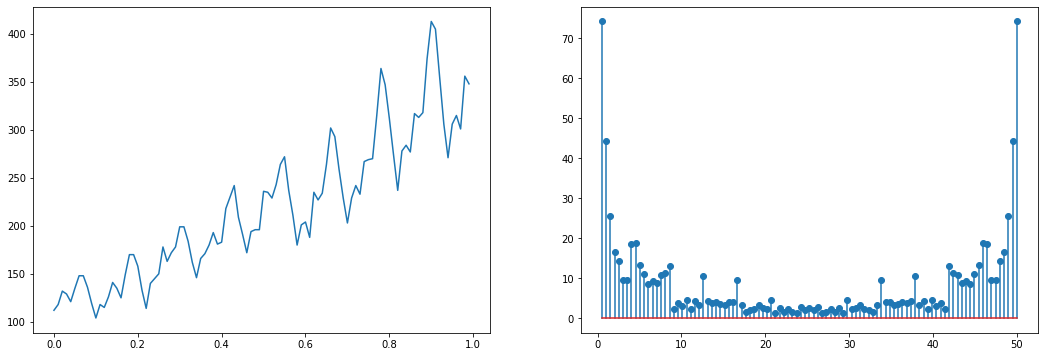

In [ ]:
# Perform Fourier transform using scipy
from scipy import fftpack
import numpy as np
# Frequency and sampling rate
f = 10 # frequency
Fs = 100 # sampling rate
t = np.arange(0,1,1/Fs)

# Sine function
#y = np.sin(2 * np.pi * f * t)

y_fft = fftpack.fft(y)
# Plot data
n = np.size(t)
print("n:",n)
fr = Fs/2 * np.linspace(0,1, int(n/1))
y_m = 2/n * abs(y_fft[0:np.size(fr)])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ax[0].plot(t, y)    # plot time series
#ax[1].stem(fr, y_m) # plot freq domain -- remove 0 to see the detail
ax[1].stem(fr[1:], y_m[1:]) # plot freq domain -- remove 0 to see the detail

In [ ]:
fr_3 = fr[0:3]
y_m_3 = y_m[0:3]
print("fr:", fr_3)
print("y_m:", y_m_3)

fr: [0.         0.50505051 1.01010101]
y_m: [436.72        74.25173072  44.28864592]


n: 100
len of matchedf: 13 [21836.           -0.j           342.61652551+3696.74352699j
   113.01419543+2211.54655971j  -294.15053441+1247.37149191j
   -47.51269699 +819.33896138j     0.           +0.j
     0.           +0.j             0.           +0.j
  -204.51894881 -903.82755478j   522.19303723 +778.17705132j]


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


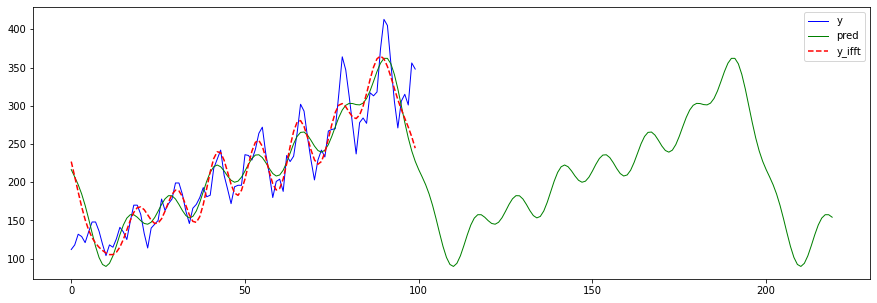

In [ ]:
# Inverse FFT from freq domain to original time domain
from scipy import fftpack
from numpy import fft
#print("len y_fft:", type(y_fft), len(y_fft), (y_fft[0:10]))

t = np.arange(0, 100)

#y_fft_cut = y_fft[0:99] #filter out a freq to see if it close match 
# try zero low amp freq (noise) -- didn't look just noise, no clear trend
treshold_amp = 16
y_fft_cut = np.zeros(y_fft.size, dtype=np.complex_)

n = np.size(t)
print("n:",n)
fr = Fs/2 * np.linspace(0,1, int(n/1))

matchedf = 0
y_m = 2/n * abs(y_fft[0:np.size(fr)])
for i, f in enumerate(y_fft):
  
  if y_m[i] > treshold_amp: 
    y_fft_cut[i] = f
    matchedf += 1
print("len of matchedf:", matchedf, y_fft_cut[0:10])

inv = fftpack.ifft(y_fft_cut, n=100)

# calculate the new data points from the FFT result
n_harm = 8
x_freqdom = y_fft_cut #y_fft
n=100
predsize2=220
f = fft.fftfreq(n)              # frequencies
indexes = list(range(n))
# sort indexes by frequency, lower -> higher
indexes.sort(key=lambda i: np.absolute(f[i]))

t2 = np.arange(0, predsize2)
res2 = np.zeros(t2.size)
for i in indexes[:1 + n_harm * 2]:
    ampli = np.absolute(x_freqdom[i]) / n   # amplitude
    phase = np.angle(x_freqdom[i])          # phase
    res2 += ampli * np.cos(2 * np.pi * f[i] * t2 + phase) 

plt.subplots(figsize=(15,5))
plt.plot(t, y, 'b', label = 'y', linewidth = 1)

plt.plot(np.arange(0, predsize2), res2, 'g', label = 'pred', linewidth = 1)

plt.plot(np.arange(0, inv.size), inv, 'r', label = 'y_ifft', linestyle="--")    # plot time series
plt.legend()
plt.show()

Using the FFT directly does not give a good prediction of future prediction values. We need to do some processing such as removing the trend first to make the data stationary.

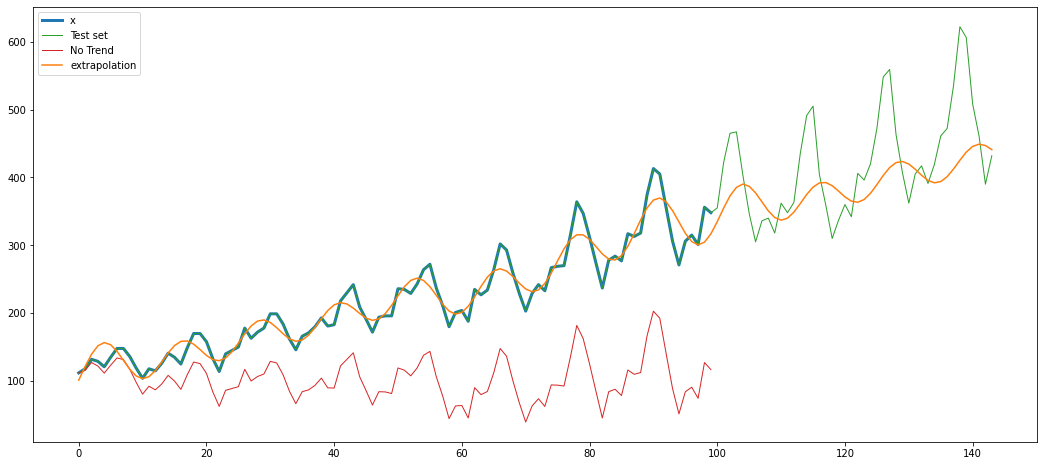

In [ ]:
#https://stackoverflow.com/questions/4479463/using-fourier-analysis-for-time-series-prediction
#https://gist.github.com/tartakynov/83f3cd8f44208a1856ce

import numpy as np
import pylab as pl
from numpy import fft

def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 8                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x

    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key=lambda i: np.absolute(f[i]))

    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return (restored_sig + p[0] * t, x_notrend)


x_orig = df["AirPassengers"] #144
x = x_orig[0:100]
n_predict = 44
(extrapolation, x_notrend) = fourierExtrapolation(x, n_predict)

pl.plot(np.arange(0, x.size), x, 'C0', label='x', linewidth=3)
pl.plot(np.arange(0, x_orig.size), x_orig, 'C2', label='Test set', linewidth=1)
pl.plot(np.arange(0, x.size), x_notrend, 'C3', label='No Trend', linewidth=1)

pl.plot(np.arange(0, extrapolation.size), extrapolation, 'C1', label='extrapolation')
pl.legend()
pl.show()

In [ ]:
# calculate MAE from 100-120
diff = np.abs(x_orig[100:120] - extrapolation[100:120])
diff.mean() #48.569

48.56931855957005

## Summary

In this notebook, we looked at how to generate synthetic data which tell us the components of time series. Then we decompose the data using Fast Furier Transform (FFT) which change the time domain into frequency domain. Those amplitude in the different frequencies sum up to generate the time series. With this, you can extend the model to predict future values.
